# Unit 5 - Financial Planning


In [63]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import date, timedelta
from MCForecastTools import MCSimulation

%matplotlib inline

In [64]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [65]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [66]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [100]:
# Fetch current BTC price
btc_get = requests.get(btc_url).json()
btc_price = btc_get["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_get = requests.get(eth_url).json()
eth_price = eth_get["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_crypto_total_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45914.40
The current value of your 5.3 ETH is $13404.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [68]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [69]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret = os.getenv("ALPACA_SECRET_KEY")
alpaca_base_url = os.getenv("ALPACA_BASE_URL")

In [70]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_key, alpaca_secret)

In [179]:
# Format current date as ISO format
start = date.today().isoformat()
end = date.today().isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
close = pd.Timestamp(today, tz = "US/Central").isoformat()
agg_spy = alpaca.get_barset(tickers, timeframe, start = start, end = end).df

# Preview DataFrame
agg_spy.tail()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-05-13 00:00:00-04:00  113.90  114.0600  113.7800  114.015  5446892   
2021-05-14 00:00:00-04:00  114.22  114.2800  114.1219  114.280  3711363   
2021-05-17 00:00:00-04:00  114.21  115.4999  111.2600  114.165  3852318   
2021-05-18 00:00:00-04:00  114.11  114.1100  114.0300  114.070  3499293   
2021-05-19 00:00:00-04:00  114.62  114.6200  113.7900  113.920  6576312   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2021-05-13 00:00:00-04:00  407.07  412.35  407.020  410.26  96524121  
2021-05-14 00:00:00-04:00  413.20  417.49  413.180  416.53  69012933  
2021-05-17 00:00:00-04:00  415.39  416.39  413.360  415.54  57713174  
2021-05-18 00:00:00-04:00  415.80  416.06  411.770  411.99  52318555  
2021-05-19 00:00:00-04:00  406.92  411.05  405.335  410.90  94165741

In [96]:
# Pick AGG and SPY close prices
agg_close_price = agg_spy.iloc[0,3]
spy_close_price = agg_spy.iloc[0,8]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [104]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
my_stocks_total_value = my_agg_value + my_spy_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


### Savings Health Analysis

In [105]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings = [{"Savings" : my_crypto_total_value}, {"Savings" : my_stocks_total_value}]
savings_df = pd.DataFrame(savings, index = ["Crypto", "Stocks"])
savings_total = my_crypto_total_value + my_stocks_total_value

# Display savings DataFrame
display(savings_df)

,Savings
Crypto,59318.524
Stocks,43682.500


,Savings
Crypto,59318.524
Stocks,43682.500


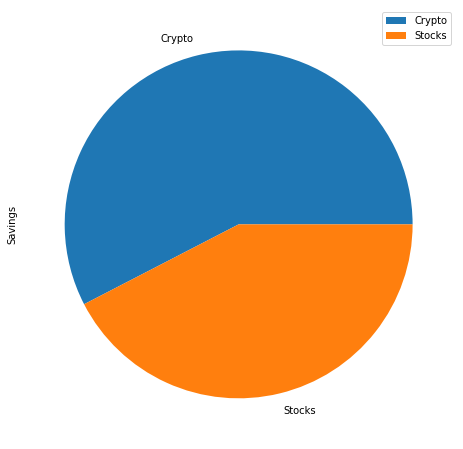

In [108]:
# Plot savings pie chart
savings_df.plot.pie(y = "Savings", figsize = (10, 8))
display(savings_df)

In [112]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_crypto_total_value + my_stocks_total_value

# Validate saving health
print(f"Your savings are greater than the needs of your emergency fund") if total_savings > emergency_fund else print(f"You need to increase your savings by ${emergency_fund - total_savings}")

Your savings are greater than the needs of your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [174]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
today = date.today().isoformat()
start_date = pd.Timestamp(today).isoformat()
five_years_back = (date.today() - timedelta(days = 5 * 252)).isoformat()
end_date = pd.Timestamp(five_years_back).isoformat()

In [180]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date , limit = 1000).df

# Display sample data
df_stock_data.tail()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-05-13 00:00:00-04:00  113.90  114.0600  113.7800  114.015  5446892   
2021-05-14 00:00:00-04:00  114.22  114.2800  114.1219  114.280  3711363   
2021-05-17 00:00:00-04:00  114.21  115.4999  111.2600  114.165  3852318   
2021-05-18 00:00:00-04:00  114.11  114.1100  114.0300  114.070  3499293   
2021-05-19 00:00:00-04:00  114.62  114.6200  113.7900  113.920  6576312   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2021-05-13 00:00:00-04:00  407.07  412.35  407.020  410.26  96524121  
2021-05-14 00:00:00-04:00  413.20  417.49  413.180  416.53  69027661  
2021-05-17 00:00:00-04:00  415.39  416.39  413.360  415.55  57714535  
2021-05-18 00:00:00-04:00  415.80  416.06  411.770  411.99  52318865  
2021-05-19 00:00:00-04:00  406.92  411.05  405.335  410.90  94165741

In [183]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim = MCSimulation(df_stock_data, [0.4, 0.6], 500, 30*252)

In [184]:
# Printing the simulation input data
df_stock_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-31 00:00:00-04:00  109.64  109.8100  109.6400  109.750  2011554   
2017-06-01 00:00:00-04:00  109.36  109.5000  109.3409  109.470  2241270   
2017-06-02 00:00:00-04:00  109.74  109.8900  109.7047  109.840  1322101   
2017-06-05 00:00:00-04:00  109.66  109.7400  109.6000  109.660  2074161   
2017-06-06 00:00:00-04:00  109.87  109.9500  109.8100  109.870  1434088   
...                           ...       ...       ...      ...      ...   
2021-05-13 00:00:00-04:00  113.90  114.0600  113.7800  114.015  5446892   
2021-05-14 00:00:00-04:00  114.22  114.2800  114.1219  114.280  3711363   
2021-05-17 00:00:00-04:00  114.21  115.4999  111.2600  114.165  3852318   
2021-05-18 00:00:00-04:00  114.11  114.1100  114.0300  114.070  3499293   
2021-05-19 00:00:00-04:00  114.62  114.6200  113.7900  113.920  6576312   

                              SPY                                      
                             open    high      low    close    volume  
time                                                                   
2017-05-31 00:00:00-04:00  241.84  241.88  240.640  241.420  59140588  
2017-06-01 00:00:00-04:00  241.96  243.34  241.640  243.320  50837868  
2017-06-02 00:00:00-04:00  243.41  244.35  243.080  244.130  50298878  
2017-06-05 00:00:00-04:00  243.98  244.30  243.760  243.965  27596403  
2017-06-06 00:00:00-04:00  243.31  243.98  243.120  243.250  36562468  
...                           ...     ...      ...      ...       ...  
2021-05-13 00:00:00-04:00  407.07  412.35  407.020  410.260  96524121  
2021-05-14 00:00:00-04:00  413.20  417.49  413.180  416.530  69027661  
2021-05-17 00:00:00-04:00  415.39  416.39  413.360  415.550  57714535  
2021-05-18 00:00:00-04:00  415.80  416.06  411.770  411.990  52318865  
2021-05-19 00:00:00-04:00  406.92  411.05  405.335  410.900  94165741  

[1000 rows x 10 columns]

In [185]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002324,0.984114,1.001556,1.005611,0.997903,1.003705,0.986362,0.984305,0.985787,0.995098,...,1.001566,0.997173,1.007192,1.009196,1.004655,0.990424,0.994858,0.993073,1.013436,1.007937
2,0.991016,0.973757,0.998863,0.994884,0.990483,1.009494,0.986996,0.984505,0.992140,0.991555,...,0.993160,0.996872,1.005870,1.011366,1.013547,0.991965,0.997926,0.979718,1.014963,1.005842
3,0.991879,0.967109,1.002181,0.989045,1.005933,1.007022,0.987119,0.993447,0.981941,0.979182,...,0.995028,1.000094,1.011965,1.021154,1.008391,0.995889,1.008108,0.966930,1.015801,1.012118
4,0.995854,0.975692,0.999222,0.985635,0.994200,1.011703,0.988395,0.992550,0.988665,0.981892,...,0.987792,1.012912,1.021046,1.036041,1.005537,0.988184,0.994216,0.970277,1.001976,1.021460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.190560,13.175510,9.776786,20.963121,25.006336,10.952579,13.314509,13.796099,13.788145,41.089459,...,43.399516,11.908870,24.175654,12.346169,15.752238,8.444116,15.997107,24.013880,7.931157,13.619899
7557,5.190110,13.238161,9.888735,20.929412,24.800311,10.847038,13.225568,13.886598,13.744035,40.964000,...,43.262521,11.871288,24.031627,12.470051,15.771455,8.519873,16.116471,24.073895,8.000802,13.605174
7558,5.108882,13.214224,10.043778,20.781326,24.848055,10.668072,13.198456,13.869032,13.731068,41.055690,...,43.195590,12.031640,23.929445,12.384076,16.019895,8.524328,16.062413,24.198662,8.016679,13.682863
7559,5.035180,13.302571,10.046338,20.805636,24.715367,10.701561,13.155020,13.794101,13.550644,41.228196,...,43.310740,11.988400,23.763599,12.296887,16.380902,8.467682,16.167068,24.053500,8.058529,13.627013


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

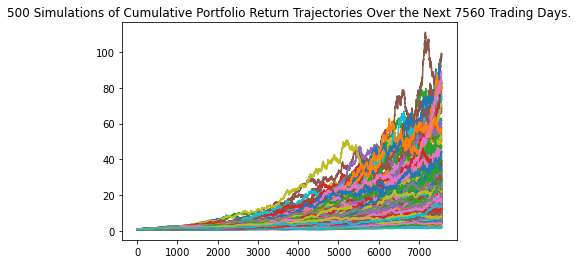

In [188]:
# Plot simulation outcomes
mc_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

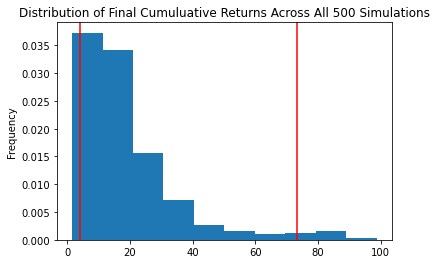

In [189]:
# Plot probability distribution and confidence intervals
mc_sim.plot_distribution()

### Retirement Analysis

In [190]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_sim_results = mc_sim.summarize_cumulative_return()

# Print summary statistics
print(mc_sim_results)

count           500.000000
mean             19.428941
std              16.243842
min               1.564556
25%               8.955762
50%              14.568226
75%              23.487075
max              98.669691
95% CI Lower      4.059255
95% CI Upper     73.184508
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [193]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_sim_results.loc["95% CI Lower"] * initial_investment,2)
ci_upper = round(mc_sim_results.loc["95% CI Upper"] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $81185.11 and $1463690.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [195]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_sim_results.loc["95% CI Lower"] * initial_investment,2)
ci_upper = round(mc_sim_results.loc["95% CI Upper"] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $121777.66 and $2195535.23


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")